In [46]:
import Augmentor
import os
import glob
import random
import matplotlib.pyplot as plt
from PIL import Image

In [47]:
input_folder = 'aug/train/'

In [50]:
ground_truth_images = sorted((glob.glob(input_folder+"imgs/*.png")))
segmentation_mask_images =[input_folder+"masks/"+each.split('/')[-1] for each in ground_truth_images]

In [51]:
collated_images_and_masks = list(zip(ground_truth_images,segmentation_mask_images))

In [52]:
images = [[np.asarray(Image.open(y)) for y in x] for x in collated_images_and_masks]


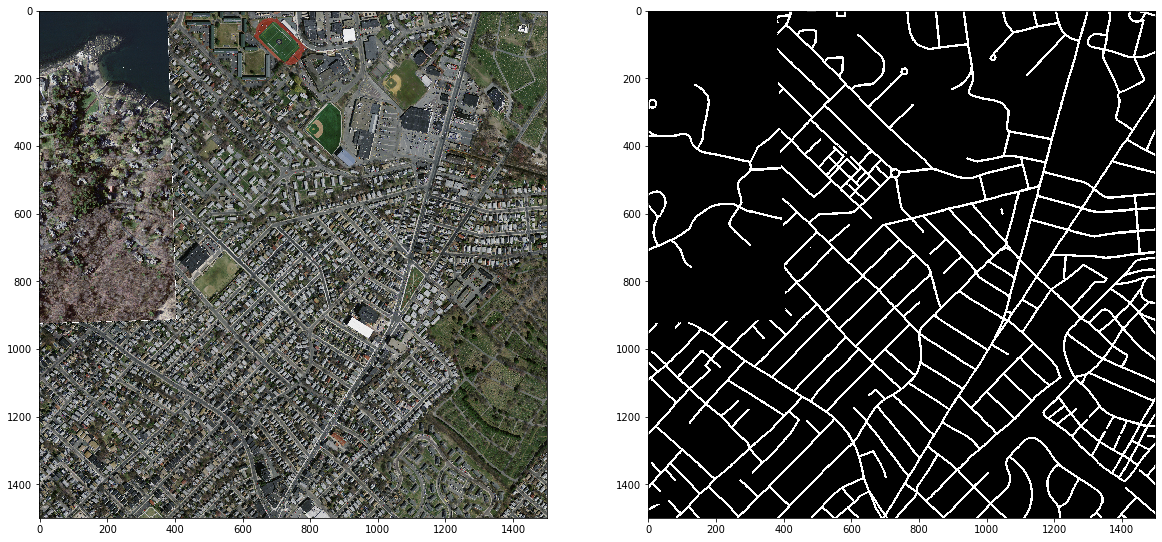

In [77]:
f, axarr = plt.subplots(1, 2, figsize=(20,15))
axarr[0].imshow(images[4][0])
axarr[1].imshow(images[4][1], cmap="gray")

In [94]:
labels = [each.split('/')[-1][:-4] for each in ground_truth_images]
p = Augmentor.DataPipeline(images,labels)

In [96]:
p.rotate_random_90(0.75)
p.flip_top_bottom(0.75)
gen = p.generator(batch_size=50)

In [97]:
os.makedirs('./augmented/train/imgs',exist_ok=True)
os.makedirs('./augmented/train/masks',exist_ok=True)

In [98]:
i = 0
while(i<5000):
    augmented_images,gen_labels = next(gen)
    for j in range(0,len(augmented_images)):
        cv2.imwrite('./augmented/train/imgs/'+gen_labels[j]+'_'+str(i)+'.png',augmented_images[j][0])
        cv2.imwrite('./augmented/train/masks/'+gen_labels[j]+'_'+str(i)+'.png',augmented_images[j][1])
        i+=1
    print('Completed {} images'.format(i))

Completed 50 images
Completed 100 images
Completed 150 images
Completed 200 images
Completed 250 images
Completed 300 images
Completed 350 images
Completed 400 images
Completed 450 images
Completed 500 images
Completed 550 images
Completed 600 images
Completed 650 images
Completed 700 images
Completed 750 images
Completed 800 images
Completed 850 images
Completed 900 images
Completed 950 images
Completed 1000 images
Completed 1050 images
Completed 1100 images
Completed 1150 images
Completed 1200 images
Completed 1250 images
Completed 1300 images
Completed 1350 images
Completed 1400 images
Completed 1450 images
Completed 1500 images
Completed 1550 images
Completed 1600 images
Completed 1650 images
Completed 1700 images
Completed 1750 images
Completed 1800 images
Completed 1850 images
Completed 1900 images
Completed 1950 images
Completed 2000 images
Completed 2050 images
Completed 2100 images
Completed 2150 images
Completed 2200 images
Completed 2250 images
Completed 2300 images
Complete

In [65]:
import cv2